In [2]:
import datetime
import dateutil
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import collections

%matplotlib inline
SAMPLE = '18/07/2016 16:54:09'
FMT = '%d/%m/%Y %H:%M:%S'
datetime.datetime.strptime(SAMPLE, FMT)

datetime.datetime(2016, 7, 18, 16, 54, 9)

In [3]:
df = pd.read_csv(
    "/home/andrea/Downloads/raw_form_responses.csv",
    )

df.drop(df.columns[3:], axis=1, inplace=True)
df.columns = map(lambda l: l.lower(), df.columns)
df.timestamp = df.timestamp.apply(func=lambda ds: datetime.datetime.strptime(ds, FMT))

In [4]:
cnt = df.winner.groupby(df.winner).count()
cnt

winner
Adrian     92
Andrea     30
Keith      13
Matt        9
Mo         19
Robbie     56
Romain      8
Stephen    23
Theed      16
Will       22
Name: winner, dtype: int64

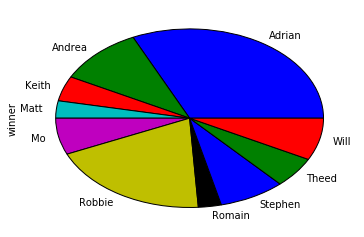

In [5]:
cnt.plot(kind='pie')

# Games played by period

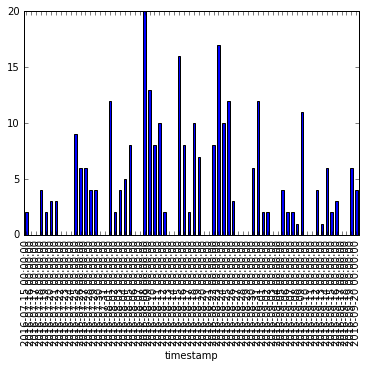

In [7]:
df.index = df.timestamp
df.games = df.winner.apply(func=lambda name: 1)
#df.winner.groupby(df.index.day).count()
df.games

grouped = df.games.groupby(pd.TimeGrouper('D')).transform(np.cumsum).resample('D').ohlc()

grouped[grouped.high > 10]

grouped.high.plot.bar()



# Best player (by winning stats)

In [180]:
# merge the winner and loser columns
loser_winners = list(df.winner.values) + list(df.loser.values)
collections.Counter(loser_winners)
df.groupby([df.winner, df.loser]).count()

timestamp
winner  loser               
Adrian  Francesco          1
        Keith              1
        Mo                 1
        Robbie            54
        Stephen            1
        Theed             11
        Will              23
Andrea  Adrian             3
        Denny              4
        Francesco          1
        Matt               3
        Romain             4
        Stephen           15
Keith   Adrian             1
        Mo                 2
        Robbie             6
        Stephen            1
        Theed              2
        Will               1
Matt    Adrian             1
        Stephen            7
        Will               1
Mo      Adrian             3
        Keith              2
        Robbie            11
        Stephen            3
Robbie  Adrian            24
        Mo                 2
        Stephen            1
        Theed              7
        Will              22
Romain  Adrian             1
        Andrea             2
        Mo                 2
        Robbie             2
        Stephen            1
Stephen Adrian             8
        Andrea             1
        Keith              1
        Matt               3
        Mo                 4
        Robbie             3
        Theed              1
        Will               2
Theed   Adrian            12
        Keith              1
        Robbie             2
        Will               1
Will    Adrian             9
        Francesco          1
        Krystyna           1
        Robbie             9
        Theed              2

# Biggest slacker

# Player improvement over time

In [51]:
df[df.loser == 'Romain']

,timestamp,winner,loser
71,05/08/2016 16:47:25,Andrea,Romain
139,15/08/2016 18:12:30,Andrea,Romain
150,16/08/2016 18:09:52,Andrea,Romain
187,23/08/2016 17:14:21,Andrea,Romain


# Rising star

# Predict next game result

In [236]:
def odds(p1, p2):
    """
    Return the odds tha player 1 has to beat player 2
    """